In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
import seaborn as sns

/tmp/ipykernel_17587/3657881644.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


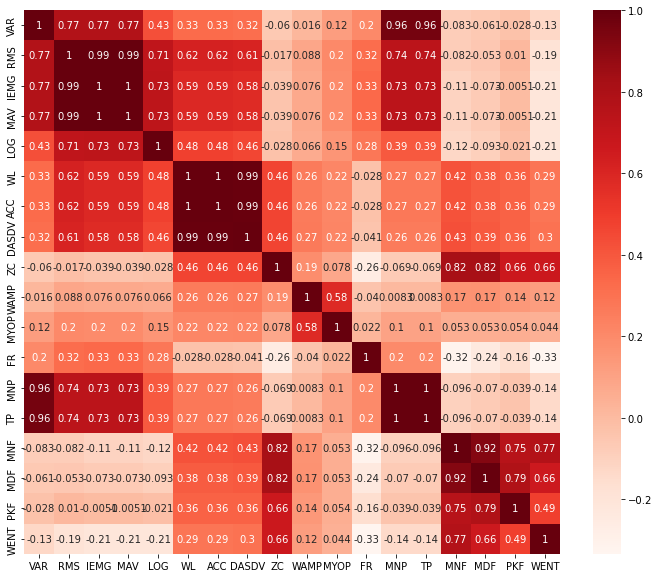

In [62]:

features_names = ['VAR', 'RMS', 'IEMG', 'MAV', 'LOG', 'WL', 'ACC', 'DASDV', 'ZC', 'WAMP', 'MYOP', "FR", "MNP", "TP",
                      "MNF", "MDF", "PKF", "WENT"]

dataset = pd.read_csv('joint_features/all.csv')

df = pd.DataFrame(dataset)
df = df.fillna(df.mean())
df = df.sample(frac=1)

X = df[features_names]
y = df['otot']

plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
# print(df.isnull().values.any())




In [55]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
clf = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=500, random_state=1)
# clf.fit(X_train, y_train)
# clf = MultinomialNB()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)


print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

/home/oddy/anaconda3/envs/tf_gpu/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/oddy/anaconda3/envs/tf_gpu/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


[[ 720  381    0  447]
 [ 220 1102    0  246]
 [   0    1    0   15]
 [ 135  168    0 1182]]
              precision    recall  f1-score   support

           0       0.67      0.47      0.55      1548
           1       0.67      0.70      0.68      1568
           2       0.00      0.00      0.00        16
           3       0.63      0.80      0.70      1485

    accuracy                           0.65      4617
   macro avg       0.49      0.49      0.48      4617
weighted avg       0.65      0.65      0.64      4617



/home/oddy/anaconda3/envs/tf_gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/oddy/anaconda3/envs/tf_gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/oddy/anaconda3/envs/tf_gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
